In [1]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
%config InlineBackend.figure_format = 'svg'

# Problem 3

In [2]:
# Initialize model
dm = em.Model(2,3)
nodes = dm.nodes
n = dm.dnodes

# Define section properties
A = 1
Iab = 200000
Ic  = 300000
xs1 = dm.xsecection('ab', A, Iab)
xs2 = dm.xsecection('c', A, Ic)

xsecs = [xs1, xs1, xs2]

# Define nodes
dm.node('1', 0.0, 0.0)
dm.node('2', 15., 0.0)
dm.node('3', 35., 0.0)
dm.node('4', 50., 0.0)

# Create beams
a, b, c = dm.girder(nodes, xsecs=xsecs)

dm.hinge(a, n['1'])
dm.hinge(c, n['4'])

# Establish fixities
dm.fix(n['1'], ['x','y', 'rz'])
dm.fix(n['2'], ['y'])
dm.fix(n['3'], ['y'])
dm.fix(n['4'], ['y', 'rz'])

# em.utilities.export.FEDEAS(dm)

[rxn-y, rxn-rz]

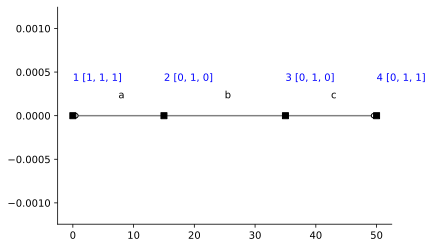

In [3]:
fig, ax = plt.subplots()
em.plot_beam(dm, ax)

# Part a) Distributed Loading

In [4]:
a.w['y'] = -10
b.w['y'] = -10

In [5]:
A = em.A_matrix(dm)
V0 = em.V_vector(A).o
a.f_matrix()

Structural_Matrix([[1.5e+01, 0.0e+00, 0.0e+00],
                   [0.0e+00, 0.0e+00, 0.0e+00],
                   [0.0e+00, 0.0e+00, 2.5e-05]])

In [6]:
c.q0_vector()

Structural_Matrix([0., 0.])

In [7]:
a.f_matrix().c.inv

Structural_Matrix([[6.66666667e-02, 0.00000000e+00],
                   [0.00000000e+00, 4.00000000e+04]])

In [9]:
Q0 = em.Q_vector(em.B_matrix(dm)).o
Q0.disp

Matrix([
[              0.0],
[          -281.25],
[              0.0],
[ 333.333333333333],
[-333.333333333333],
[              0.0],
[              0.0]])